# A Comprehensive Guide to Data Cleaning with Pandas

Welcome to this tutorial on data cleaning! Real-world data is often messy and inconsistent. Before any meaningful analysis or machine learning can be done, the data must be cleaned. This process, often called data wrangling or preprocessing, is a critical first step in any data science project.

This notebook will cover:
1.  **Creating a Synthetic Messy Dataset:** We will generate a dataset with common issues like missing values, incorrect data types, duplicates, and inconsistent formatting.
2.  **Initial Data Inspection:** Using fundamental pandas functions to understand the state of our data.
3.  **Step-by-Step Cleaning:** Applying a wide range of pandas functions to systematically clean the data.
    - Handling Missing Values
    - Correcting Data Types
    - Removing Duplicates
    - Standardizing String and Text Data
    - Identifying and Handling Outliers
    - Creating and Transforming Features
    - Tidying Up the DataFrame

### 1. Setup and Synthetic Dataset Generation

First, let's import pandas and create our messy dataset. This dataset represents fictional employee records with various intentional errors.

In [1]:
import pandas as pd
import numpy as np

# Create a dictionary with messy data
data = {
    'EmployeeID': ['E001', 'E002', 'E003', 'E004', 'E005', 'E006', None, 'E008', 'E009', 'E010', 'E002'],
    'Name': ['John Smith', 'Jane Doe', 'Peter Jones', 'Mary Jane', '   Tom Brown', 'John Smith', 'Alice Blue', 'Robert Green', 'PETER JONES', 'Susan White', 'Jane Doe'],
    'Department': ['Sales', 'Marketing', '  Sales', 'HR', 'IT', 'Marketing', 'IT', 'Finance', 'Sales', 'hr', 'Marketing'],
    'StartDate': ['2020-01-15', '2019/03/12', '2021-05-21', '2018-11-30', '2022-02-01', '2023-07-10', '2022-02-01', '2018-11-30', '2021-05-21', '2023-01-15', '2019/03/12'],
    'Salary': ['$60,000', '75000', '$62,000', '55000', '$120,000', '76000', '110000', '$90,000', '62000', '$54,000', '75000'],
    'PerformanceScore': [4.5, 3.8, 4.7, 3.2, 5.0, 3.9, 4.8, 3.5, 4.7, 'Not Available', 3.8],
    'LastBonus': [5000, 4000, 5200, 3000, 10000, 4100, 9500, 6000, 5200, None, 4000],
    'YearsAtCompany': [4, 5, 3, 6, 2, 1, 2, 6, 3, 1, 5]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Introduce some more NaN values strategically
df.loc[4, 'YearsAtCompany'] = np.nan
df.loc[6, 'Salary'] = np.nan
df.loc[1, 'LastBonus'] = np.nan

### 2. Initial Data Inspection

Before we change anything, we need to understand the data. This involves looking at its shape, data types, and summary statistics.

#### `df.head()` and `df.sample()`
Let's look at the first few rows to get a feel for the columns and values.

In [3]:
df.head(11) # Display all rows to see the initial mess

,EmployeeID,Name,Department,StartDate,Salary,PerformanceScore,LastBonus,YearsAtCompany
0,E001,John Smith,Sales,2020-01-15,"$60,000",4.5,5000.0,4.0
1,E002,Jane Doe,Marketing,2019/03/12,75000,3.8,NaN,5.0
2,E003,Peter Jones,Sales,2021-05-21,"$62,000",4.7,5200.0,3.0
3,E004,Mary Jane,HR,2018-11-30,55000,3.2,3000.0,6.0
4,E005,Tom Brown,IT,2022-02-01,"$120,000",5.0,10000.0,NaN
5,E006,John Smith,Marketing,2023-07-10,76000,3.9,4100.0,1.0
6,None,Alice Blue,IT,2022-02-01,NaN,4.8,9500.0,2.0
7,E008,Robert Green,Finance,2018-11-30,"$90,000",3.5,6000.0,6.0
8,E009,PETER JONES,Sales,2021-05-21,62000,4.7,5200.0,3.0
9,E010,Susan White,hr,2023-01-15,"$54,000",Not Available,NaN,1.0


#### `df.info()`
This method provides a concise summary of the DataFrame, including the data type of each column, the number of non-null values, and memory usage. This is our primary tool for spotting type and missing value issues.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EmployeeID        10 non-null     object 
 1   Name              11 non-null     object 
 2   Department        11 non-null     object 
 3   StartDate         11 non-null     object 
 4   Salary            10 non-null     object 
 5   PerformanceScore  11 non-null     object 
 6   LastBonus         9 non-null      float64
 7   YearsAtCompany    10 non-null     float64
dtypes: float64(2), object(6)
memory usage: 836.0+ bytes


**Initial Observations from `.info()`:**
- `EmployeeID` has a missing value.
- `Name` and `Department` look complete but we suspect formatting issues.
- `StartDate` is an `object` type, not `datetime`.
- `Salary` is an `object` type due to '$' and commas.
- `PerformanceScore` is an `object` type because of the 'Not Available' string.
- `LastBonus` and `YearsAtCompany` have missing values and are `float64`, which is fine for now.

#### `df.describe()`
This function generates descriptive statistics. For numerical columns, it includes count, mean, std, min, max, and quartiles. Using `include='all'` shows stats for object columns too.

In [7]:
df.describe(include='all')

,EmployeeID,Name,Department,StartDate,Salary,PerformanceScore,LastBonus,YearsAtCompany
count,10,11,11,11,10,11.0,9.000000,10.000000
unique,9,9,7,7,9,9.0,NaN,NaN
top,E002,John Smith,Marketing,2019/03/12,75000,3.8,NaN,NaN
freq,2,2,3,2,2,2.0,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,5777.777778,3.600000
std,NaN,NaN,NaN,NaN,NaN,NaN,2415.976913,1.897367
min,NaN,NaN,NaN,NaN,NaN,NaN,3000.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,4100.000000,2.250000
50%,NaN,NaN,NaN,NaN,NaN,NaN,5200.000000,3.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,6000.000000,5.000000


**Observations from `.describe()`:**
- **Name:** `unique` is 9 but `count` is 11, indicating duplicates. `top` is 'Jane Doe'.
- **Department:** `unique` is 6, but we know there should be fewer (e.g., 'Sales' and '  Sales' should be one). `top` is 'Marketing'.
- **EmployeeID:** `unique` is 9, confirming a duplicate ID 'E002'.
- **YearsAtCompany:** The `mean` (3.7) and `std` (1.8) give us a sense of the distribution.

### 3. Step-by-Step Cleaning

Now, we will address the issues we've identified in a logical order. A good practice is to create a copy of the original DataFrame to work on.

In [9]:
df_cleaned = df.copy()

#### Step 3.1: Handling Duplicates

We noticed that row 10 is a complete duplicate of row 1 (when considering 'Jane Doe'), and there are duplicate Employee IDs and Names. We can use `duplicated()` to find them and `drop_duplicates()` to remove them.

In [11]:
# Check for duplicate rows based on all columns
print(f"Number of fully duplicate rows: {df_cleaned.duplicated().sum()}\n")

# Check for duplicates based on a subset of columns, like EmployeeID
print(f"Number of duplicate EmployeeIDs: {df_cleaned.duplicated(subset=['EmployeeID']).sum()}\n")

# Let's drop duplicates based on EmployeeID, keeping the first instance
df_cleaned.drop_duplicates(subset=['EmployeeID'], keep='first', inplace=True)

print("DataFrame after dropping duplicates based on EmployeeID:")
df_cleaned.head(11)

Number of fully duplicate rows: 0

Number of duplicate EmployeeIDs: 1

DataFrame after dropping duplicates based on EmployeeID:


,EmployeeID,Name,Department,StartDate,Salary,PerformanceScore,LastBonus,YearsAtCompany
0,E001,John Smith,Sales,2020-01-15,"$60,000",4.5,5000.0,4.0
1,E002,Jane Doe,Marketing,2019/03/12,75000,3.8,NaN,5.0
2,E003,Peter Jones,Sales,2021-05-21,"$62,000",4.7,5200.0,3.0
3,E004,Mary Jane,HR,2018-11-30,55000,3.2,3000.0,6.0
4,E005,Tom Brown,IT,2022-02-01,"$120,000",5.0,10000.0,NaN
5,E006,John Smith,Marketing,2023-07-10,76000,3.9,4100.0,1.0
6,None,Alice Blue,IT,2022-02-01,NaN,4.8,9500.0,2.0
7,E008,Robert Green,Finance,2018-11-30,"$90,000",3.5,6000.0,6.0
8,E009,PETER JONES,Sales,2021-05-21,62000,4.7,5200.0,3.0
9,E010,Susan White,hr,2023-01-15,"$54,000",Not Available,NaN,1.0


#### Step 3.2: Cleaning Column Names and Text Data

Consistency is key. We'll standardize text data by converting to a consistent case and removing leading/trailing whitespaces.

In [13]:
# Clean up column names (e.g., lowercase and replace spaces)
df_cleaned.columns = df_cleaned.columns.str.lower().str.replace(' ', '_')

# Clean string columns
for col in ['name', 'department']:
    df_cleaned[col] = df_cleaned[col].str.strip() # Remove leading/trailing spaces
    df_cleaned[col] = df_cleaned[col].str.title() # Convert to Title Case for consistency
    
# Let's check the value counts for 'department' now
print(df_cleaned['department'].value_counts())

df_cleaned.head(11)

department
Sales        3
Marketing    2
Hr           2
It           2
Finance      1
Name: count, dtype: int64


,employeeid,name,department,startdate,salary,performancescore,lastbonus,yearsatcompany
0,E001,John Smith,Sales,2020-01-15,"$60,000",4.5,5000.0,4.0
1,E002,Jane Doe,Marketing,2019/03/12,75000,3.8,NaN,5.0
2,E003,Peter Jones,Sales,2021-05-21,"$62,000",4.7,5200.0,3.0
3,E004,Mary Jane,Hr,2018-11-30,55000,3.2,3000.0,6.0
4,E005,Tom Brown,It,2022-02-01,"$120,000",5.0,10000.0,NaN
5,E006,John Smith,Marketing,2023-07-10,76000,3.9,4100.0,1.0
6,None,Alice Blue,It,2022-02-01,NaN,4.8,9500.0,2.0
7,E008,Robert Green,Finance,2018-11-30,"$90,000",3.5,6000.0,6.0
8,E009,Peter Jones,Sales,2021-05-21,62000,4.7,5200.0,3.0
9,E010,Susan White,Hr,2023-01-15,"$54,000",Not Available,NaN,1.0


#### Step 3.3: Correcting Data Types

We need to convert `salary`, `performancescore`, and `startdate` to their correct types. We'll use `pd.to_numeric` and `pd.to_datetime`, using the `errors='coerce'` argument to turn problematic values into `NaN` (Not a Number), which we can handle next.

In [15]:
# Clean and convert 'salary'
# First, remove '$' and ',' then convert to numeric
df_cleaned['salary'] = df_cleaned['salary'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df_cleaned['salary'] = pd.to_numeric(df_cleaned['salary'], errors='coerce')

# Convert 'performancescore' to numeric
df_cleaned['performancescore'] = pd.to_numeric(df_cleaned['performancescore'], errors='coerce')

# Convert 'startdate' to datetime
df_cleaned['startdate'] = pd.to_datetime(df_cleaned['startdate'], errors='coerce')

# Check the dtypes again
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   employeeid        9 non-null      object        
 1   name              10 non-null     object        
 2   department        10 non-null     object        
 3   startdate         9 non-null      datetime64[ns]
 4   salary            9 non-null      float64       
 5   performancescore  9 non-null      float64       
 6   lastbonus         8 non-null      float64       
 7   yearsatcompany    9 non-null      float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 720.0+ bytes


Now our data types are correct, and invalid entries have been converted to `NaN`.

#### Step 3.4: Handling Missing Values

Missing data can be handled by dropping the rows/columns or by imputing (filling in) the values. The strategy depends on the context and the amount of missing data.

In [17]:
# Count missing values in each column
print("Missing values before imputation:")
print(df_cleaned.isnull().sum())

Missing values before imputation:
employeeid          1
name                0
department          0
startdate           1
salary              1
performancescore    1
lastbonus           2
yearsatcompany      1
dtype: int64


**Imputation Strategies:**
- **`employeeid`:** This is a unique identifier. A row without it is not useful, so we can drop it.
- **`salary`, `lastbonus`, `performancescore`:** For these numerical columns, we can fill missing values with the mean or median. The median is generally more robust to outliers.
- **`yearsatcompany`:** We can fill this with the median as well.

In [19]:
# Drop rows where 'employeeid' is missing
df_cleaned.dropna(subset=['employeeid'], inplace=True)

# Impute numerical columns with the median
for col in ['salary', 'lastbonus', 'performancescore', 'yearsatcompany']:
    median_val = df_cleaned[col].median()
    df_cleaned[col].fillna(median_val, inplace=True)

print("\nMissing values after imputation:")
print(df_cleaned.isnull().sum())


Missing values after imputation:
employeeid          0
name                0
department          0
startdate           1
salary              0
performancescore    0
lastbonus           0
yearsatcompany      0
dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_19796\1889086954.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(median_val, inplace=True)


In [21]:
df_cleaned.head(10)

,employeeid,name,department,startdate,salary,performancescore,lastbonus,yearsatcompany
0,E001,John Smith,Sales,2020-01-15,60000.0,4.5,5000.0,4.0
1,E002,Jane Doe,Marketing,NaT,75000.0,3.8,5200.0,5.0
2,E003,Peter Jones,Sales,2021-05-21,62000.0,4.7,5200.0,3.0
3,E004,Mary Jane,Hr,2018-11-30,55000.0,3.2,3000.0,6.0
4,E005,Tom Brown,It,2022-02-01,120000.0,5.0,10000.0,3.5
5,E006,John Smith,Marketing,2023-07-10,76000.0,3.9,4100.0,1.0
7,E008,Robert Green,Finance,2018-11-30,90000.0,3.5,6000.0,6.0
8,E009,Peter Jones,Sales,2021-05-21,62000.0,4.7,5200.0,3.0
9,E010,Susan White,Hr,2023-01-15,54000.0,4.2,5200.0,1.0


#### Step 3.5: Identifying and Handling Outliers

Outliers can skew statistical analyses and machine learning models. A common method to identify them is using the Interquartile Range (IQR).

An outlier is a data point that falls outside of `Q1 - 1.5 * IQR` or `Q3 + 1.5 * IQR`.

Let's check the `salary` column for outliers.

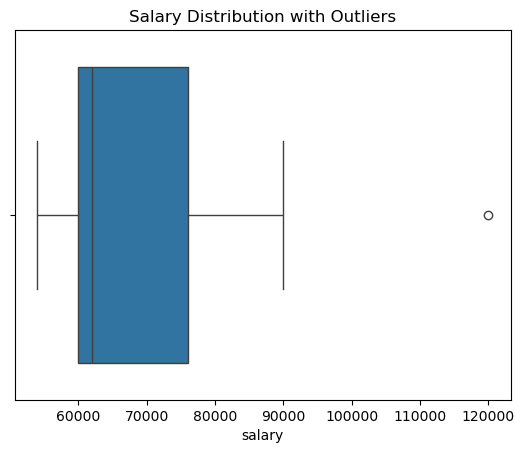

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df_cleaned['salary'])
plt.title('Salary Distribution with Outliers')
plt.show()

The box plot shows a salary at $120,000 which might be an outlier. Let's confirm with the IQR method.

In [25]:
Q1 = df_cleaned['salary'].quantile(0.25)
Q3 = df_cleaned['salary'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Salary Lower Bound for Outliers: {lower_bound}")
print(f"Salary Upper Bound for Outliers: {upper_bound}\n")

# Filter to see the outliers
outliers = df_cleaned[(df_cleaned['salary'] < lower_bound) | (df_cleaned['salary'] > upper_bound)]
print("Identified Outliers:")
outliers

Salary Lower Bound for Outliers: 36000.0
Salary Upper Bound for Outliers: 100000.0

Identified Outliers:


,employeeid,name,department,startdate,salary,performancescore,lastbonus,yearsatcompany
4,E005,Tom Brown,It,2022-02-01,120000.0,5.0,10000.0,3.5


For this tutorial, we will **cap** the outlier, meaning we will replace any salary above the `upper_bound` with the `upper_bound` value itself. This is a common way to handle outliers without removing the entire row.

In [27]:
df_cleaned['salary'] = np.where(df_cleaned['salary'] > upper_bound, upper_bound, df_cleaned['salary'])

# Verify by checking the max salary now
print(f"Max salary after capping: {df_cleaned['salary'].max()}")

Max salary after capping: 100000.0


#### Step 3.6: Feature Engineering

Sometimes, you need to create new features from existing ones. For example, we can create a `bonus_to_salary_ratio` to see how the bonus compares to the salary.

In [29]:
df_cleaned['bonus_to_salary_ratio'] = (df_cleaned['lastbonus'] / df_cleaned['salary']).round(2)
df_cleaned.head(10)

,employeeid,name,department,startdate,salary,performancescore,lastbonus,yearsatcompany,bonus_to_salary_ratio
0,E001,John Smith,Sales,2020-01-15,60000.0,4.5,5000.0,4.0,0.08
1,E002,Jane Doe,Marketing,NaT,75000.0,3.8,5200.0,5.0,0.07
2,E003,Peter Jones,Sales,2021-05-21,62000.0,4.7,5200.0,3.0,0.08
3,E004,Mary Jane,Hr,2018-11-30,55000.0,3.2,3000.0,6.0,0.05
4,E005,Tom Brown,It,2022-02-01,100000.0,5.0,10000.0,3.5,0.10
5,E006,John Smith,Marketing,2023-07-10,76000.0,3.9,4100.0,1.0,0.05
7,E008,Robert Green,Finance,2018-11-30,90000.0,3.5,6000.0,6.0,0.07
8,E009,Peter Jones,Sales,2021-05-21,62000.0,4.7,5200.0,3.0,0.08
9,E010,Susan White,Hr,2023-01-15,54000.0,4.2,5200.0,1.0,0.10


#### Step 3.7: Final Review

Let's do a final check of our cleaned DataFrame.

In [31]:
print("Final DataFrame Info:")
df_cleaned.info()

print("\nFinal DataFrame Description:")
df_cleaned.describe()

print("\nFinal DataFrame Head:")
df_cleaned.head(10)

Final DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   employeeid             9 non-null      object        
 1   name                   9 non-null      object        
 2   department             9 non-null      object        
 3   startdate              8 non-null      datetime64[ns]
 4   salary                 9 non-null      float64       
 5   performancescore       9 non-null      float64       
 6   lastbonus              9 non-null      float64       
 7   yearsatcompany         9 non-null      float64       
 8   bonus_to_salary_ratio  9 non-null      float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 720.0+ bytes

Final DataFrame Description:

Final DataFrame Head:


,employeeid,name,department,startdate,salary,performancescore,lastbonus,yearsatcompany,bonus_to_salary_ratio
0,E001,John Smith,Sales,2020-01-15,60000.0,4.5,5000.0,4.0,0.08
1,E002,Jane Doe,Marketing,NaT,75000.0,3.8,5200.0,5.0,0.07
2,E003,Peter Jones,Sales,2021-05-21,62000.0,4.7,5200.0,3.0,0.08
3,E004,Mary Jane,Hr,2018-11-30,55000.0,3.2,3000.0,6.0,0.05
4,E005,Tom Brown,It,2022-02-01,100000.0,5.0,10000.0,3.5,0.10
5,E006,John Smith,Marketing,2023-07-10,76000.0,3.9,4100.0,1.0,0.05
7,E008,Robert Green,Finance,2018-11-30,90000.0,3.5,6000.0,6.0,0.07
8,E009,Peter Jones,Sales,2021-05-21,62000.0,4.7,5200.0,3.0,0.08
9,E010,Susan White,Hr,2023-01-15,54000.0,4.2,5200.0,1.0,0.10


## Conclusion

We have successfully transformed a messy dataset into a clean, well-structured format ready for analysis. We performed the following key steps:

1.  **Inspected the data** to identify issues with duplicates, data types, formatting, and missing values.
2.  **Removed duplicate entries** to ensure data integrity.
3.  **Standardized text data** by cleaning whitespace and ensuring consistent capitalization.
4.  **Corrected data types** for dates and numbers, enabling proper calculations.
5.  **Imputed missing values** using a median-based strategy to preserve the dataset's size.
6.  **Identified and handled an outlier** using the IQR method to prevent skewing.
7.  **Engineered a new feature** to add more value to the dataset.

This workflow is a foundational part of nearly every data science project.